# Load Dependency

In [1]:
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import r2_score,mean_absolute_error
from scipy.stats import pearsonr
from script.DescriptorProcess import genDescDataset
import matplotlib.pyplot as plt
import numpy as np
random_seed = 2022

RDKit WARNING: [19:18:34] Enabling RDKit 2019.09.3 jupyter extensions
[19:18:34] Enabling RDKit 2019.09.3 jupyter extensions


# Data Prepross

In [3]:
dataset_physorg_desc = np.load('../descriptors/dataset_physorg_desc.npz')
physorg_desc = dataset_physorg_desc['descriptors']
physorg_desc_names = dataset_physorg_desc['descriptor_names']
ddG = dataset_physorg_desc['target']
test_index = [21, 58, 61, 110, 112, 114, 116, 122, 124, 127]
train_val_index = list(set(range(len(physorg_desc))) - set(test_index))

train_val_x,train_val_y = physorg_desc[train_val_index],ddG[train_val_index]
test_x,test_y = physorg_desc[test_index],ddG[test_index]

In [4]:
desc_dataset = genDescDataset(physorg_desc,physorg_desc_names,ddG)

In [5]:
desc_dataset

,Biaryl_q(N)_C,Biaryl_q(N+1)_C,Biaryl_xTB Chrg_C,Biaryl_q(N)_H,Biaryl_q(N+1)_H,Biaryl_xTB Chrg_H,Olefin_q(N+1)_C1,Olefin_Nucleophilicity_C1,Olefin_s-_C1,Olefin_xTB Chrg_C1,...,Add_13,Sol_0,Sol_1,Sol_2,Sol_3,Sol_4,Sol_5,Current,Temperature,ddG(kcal/mol)
0,0.425197,0.867391,0.405820,0.5625,0.865306,0.142322,0.537165,0.448536,0.112838,0.775094,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.375,0.333333,3.507522
1,0.425197,0.867391,0.405820,0.5625,0.865306,0.142322,0.537165,0.448536,0.112838,0.775094,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000,0.333333,3.507522
2,0.425197,0.867391,0.405820,0.5625,0.865306,0.142322,0.537165,0.448536,0.112838,0.775094,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.375,0.333333,3.507522
3,0.425197,0.867391,0.405820,0.5625,0.865306,0.142322,0.537165,0.448536,0.112838,0.775094,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000,0.333333,3.507522
4,0.425197,0.867391,0.405820,0.5625,0.865306,0.142322,0.537165,0.448536,0.112838,0.775094,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.500,0.333333,3.507522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0.425197,0.867391,0.405820,0.5625,0.865306,0.142322,0.564823,0.198612,0.381757,0.227198,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.375,0.333333,1.714028
125,0.425197,0.867391,0.405820,0.5625,0.865306,0.142322,0.222126,0.382231,0.463176,0.792578,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.250,0.333333,2.772852
126,0.425197,0.867391,0.405820,0.5625,0.865306,0.142322,0.617978,0.442154,0.138514,0.778067,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.375,0.333333,2.578852
127,0.803150,0.067391,0.820712,0.9375,0.171429,0.174295,0.537165,0.448536,0.112838,0.775094,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.375,0.333333,2.772852


# Feature Selection with RFECV Algorithm

In [6]:
model = ExtraTreesRegressor(n_jobs=-1,random_state=random_seed)
cv = KFold(n_splits=10, shuffle=True, random_state=random_seed)
selector = RFECV(model, step=1, min_features_to_select=1,cv=cv, n_jobs=-1)
selector = selector.fit(train_val_x, train_val_y)
sel_index = np.where(selector.support_==True)[0]
print('----Reserved Descriptors----')
print('Size: %d'%len(sel_index))

----Reserved Descriptors----
Size: 39


Text(0, 0.5, 'Score')

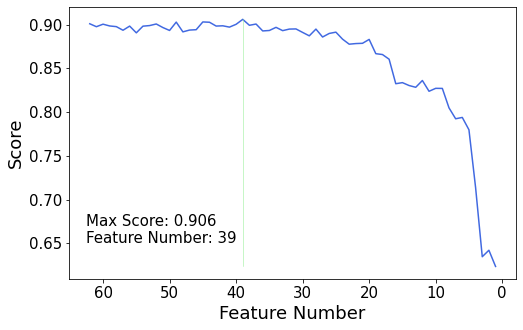

In [7]:
tick_fontsize = 15
label_fontsize = 18
fig = plt.figure(figsize=(8,5))
y_r2 = np.flipud(selector.grid_scores_)
x_1_index = [item+1 for item in list(range(len(y_r2)))]

plt.plot(x_1_index,y_r2,c='royalblue')
plt.plot([np.argmax(y_r2)+1,np.argmax(y_r2)+1],[np.min(y_r2),np.max(y_r2)],c='lightgreen',linewidth=0.5)

init_range = [item+1 for item in list(range(len(y_r2)))]
reverse_range = list(range(len(y_r2),0,-1))
reverse_init_range_map = {rev:init for rev,init in zip(reverse_range,init_range)}
reverse_init_range_map[len(y_r2)+1] = 0
reverse_init_range_map[50] = len(y_r2)+1-50
reverse_init_range_map[0] = len(y_r2)+1
num_range = list(range(60,-10,-10))

plt.xticks([reverse_init_range_map[item] for item in num_range],
           list(map(str,num_range)),fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)

plt.text(0.5,0.67,'Max Score: %.3f'%np.max(y_r2),fontsize=tick_fontsize)
plt.text(0.5,0.65,'Feature Number: %d'%(len(y_r2) - np.argmax(y_r2)),fontsize=tick_fontsize)

plt.xlabel('Feature Number',fontsize=label_fontsize)
plt.ylabel('Score',fontsize=label_fontsize)

# Regression Performan at Cross-Validation and Out-of-Sample Test Set

## Cross-Validation

In [9]:
val_Y = []
val_P = []
kfold = KFold(n_splits=10, shuffle=True, random_state=random_seed)
for train_idx,val_idx in kfold.split(train_val_x):
    train_x,val_x = train_val_x[train_idx],train_val_x[val_idx]
    train_y,val_y = train_val_y[train_idx],train_val_y[val_idx]
    val_P_ = []
    for try_ in range(10): 
        model.fit(train_x,train_y)
        val_p = model.predict(val_x)
        val_P_.append(val_p)
    val_P_ = np.mean(val_P_,axis=0)
    val_P.append(val_P_)
    val_Y.append(val_y)
val_P = np.concatenate(val_P)
val_Y = np.concatenate(val_Y)
mae = mean_absolute_error(val_Y,val_P)
r2 = r2_score(val_Y,val_P)
pearson_r,_ = pearsonr(val_Y,val_P)

print("MAE: %.4f, R2: %.4f, Pearson R: %.4f"%(mae,r2,pearson_r))

MAE: 0.2291, R2: 0.9147, Pearson R: 0.9566


## Out-of-Sample Test Set

In [10]:
test_P = []
feature_importance = []
for _ in range(10):
    model.fit(train_val_x[:,sel_index],train_val_y)
    feature_importance.append(model.feature_importances_)
    test_p = model.predict(test_x[:,sel_index])
    test_P.append(test_p)
test_P = np.mean(test_P,axis=0)
feature_importance = np.mean(feature_importance,axis=0)
shorted_feature_names = np.array(physorg_desc_names)[sel_index]
sorted_feature_index = np.argsort(feature_importance)
importance_desc_names = shorted_feature_names[sorted_feature_index]
importance_of_sel_desc = feature_importance[sorted_feature_index]

r2 = r2_score(test_y,test_P)
pearson_r,_ = pearsonr(test_y,test_P)
mae = mean_absolute_error(test_y,test_P)
print("MAE: %.4f, R2: %.4f, Pearson R: %.4f"%(mae,r2,pearson_r))

MAE: 0.3514, R2: 0.8771, Pearson R: 0.9621


# Visualization

## Regression

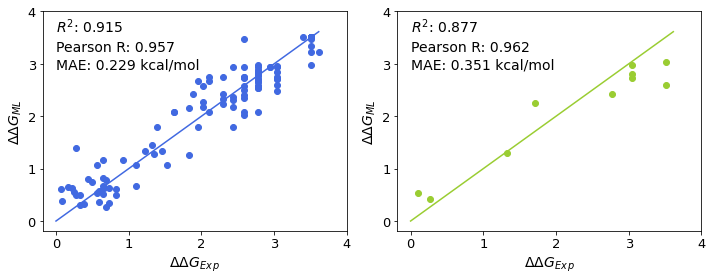

In [11]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter(val_Y,val_P,c='royalblue')

plt.text(0,3.6,'$R^2$: %.3f'%r2_score(val_Y,val_P),fontsize=14)
plt.text(0,3.25,'Pearson R: %.3f'%pearsonr(val_Y,val_P)[0],fontsize=14)
plt.text(0,2.9,'MAE: %.3f kcal/mol'%mean_absolute_error(val_Y,val_P),fontsize=14)

plt.plot([0,ddG.max()],[0,ddG.max()],c='royalblue')
plt.xlabel('$\Delta$$\Delta$$G_E$$_x$$_p$',fontsize=14)
plt.ylabel('$\Delta$$\Delta$$G_M$$_L$',fontsize=14)
plt.xticks([0,1,2,3,4],list(map(str,[0,1,2,3,4])),fontsize=13)
plt.yticks([0,1,2,3,4],list(map(str,[0,1,2,3,4])),fontsize=13)
plt.tick_params(bottom='on',left='on')
#plt.yticks(fontsize=14)


plt.subplot(122)
plt.scatter(test_y,test_P,c='yellowgreen')
plt.text(0,3.6,'$R^2$: %.3f'%r2_score(test_y,test_P),fontsize=14)
plt.text(0,3.25,'Pearson R: %.3f'%pearsonr(test_y,test_P)[0],fontsize=14)
plt.text(0,2.9,'MAE: %.3f kcal/mol'%mean_absolute_error(test_y,test_P),fontsize=14)
plt.plot([0,ddG.max()],[0,ddG.max()],c='yellowgreen')
plt.xlabel('$\Delta$$\Delta$$G_E$$_x$$_p$',fontsize=14)
plt.ylabel('$\Delta$$\Delta$$G_M$$_L$',fontsize=14)
plt.xticks([0,1,2,3,4],list(map(str,[0,1,2,3,4])),fontsize=13)
plt.yticks([0,1,2,3,4],list(map(str,[0,1,2,3,4])),fontsize=13)
plt.tick_params(bottom='on',left='on')
plt.tight_layout()

## Feature Importance

In [12]:
color_map = {}
for name in importance_desc_names:
    if "Olefin" in name:
        color_map[name] = "bisque"
    elif "TDG" in name:
        color_map[name] = "lightblue"

In [13]:
importance_colors = []
for name in importance_desc_names:
    try:
        importance_colors.append(color_map[name])
    except:
        importance_colors.append('gray')

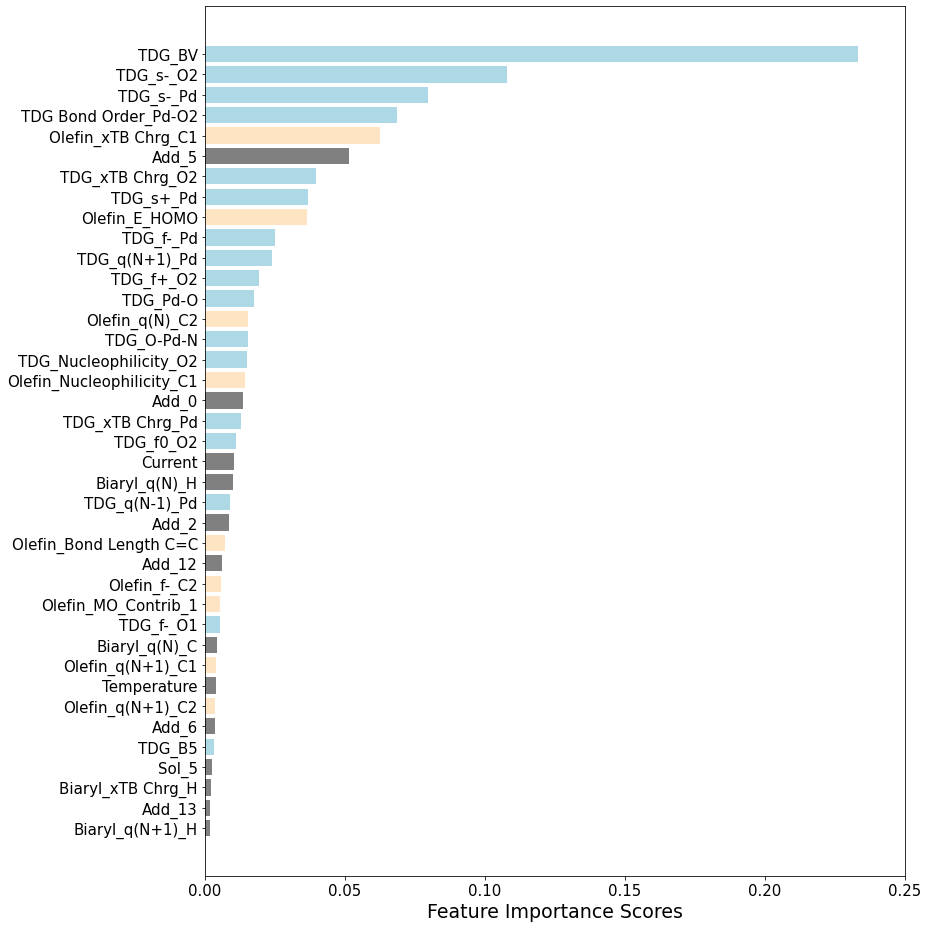

In [14]:
fig = plt.figure(figsize=(13,13))

plt.barh(importance_desc_names, importance_of_sel_desc, color=importance_colors,align='center')
plt.xlabel('Feature Importance Scores',fontsize=19)
plt.xticks([0,0.05,0.1,0.15,0.2,0.25],["0.00","0.05","0.10",'0.15',"0.20","0.25"],fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(left='on',bottom='on')
plt.tight_layout()
print()